In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
from datetime import datetime
import re
import spacy
import string
import wordcloud 
from wordcloud import WordCloud

In [37]:
custom_date = lambda x: datetime.strptime(x.split()[0], '%Y-%m-%d')
df = pd.read_csv('tweets.csv', parse_dates=['date'], date_parser=custom_date)

C:\Users\User\AppData\Local\Temp\ipykernel_12356\24167535.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('tweets.csv', parse_dates=['date'], date_parser=custom_date)


In [38]:
df.sample(5)

id                                               text  \
13446          11782136751  Trump SoHo opens this Friday and it is fantast...   
54373  1136067842879709184  Washed up psycho @BetteMidler was forced to ap...   
36590   589705949788688384  """@CityBlindsMIB: @realDonaldTrump With Mr Tr...   
28541   494035617584386049  """@Bigbabygoulos: What will make you decide t...   
6491   1217320305468878848  RT @senatemajldr: First, Democrats spent weeks...   

      isRetweet isDeleted               device  favorites  retweets  \
13446         f         f   Twitter Web Client         10        16   
54373         f         f   Twitter for iPhone     115910     25497   
36590         f         f  Twitter for Android         39        36   
28541         f         f  Twitter for Android         29        27   
6491          t         f   Twitter for iPhone          0     14689   

            date isFlagged  
13446 2010-04-07         f  
54373 2019-06-05         f  
36590 2015-04-19         f  
28541 2014-07-29         f  
6491  2020-01-15         f

In [39]:
df.isna().sum()

id           0
text         0
isRetweet    0
isDeleted    0
device       0
favorites    0
retweets     0
date         0
isFlagged    0
dtype: int64

In [40]:
df.describe()

id     favorites       retweets  \
count  5.657100e+04  5.657100e+04   56571.000000   
mean   7.987865e+17  2.834955e+04    8618.987467   
min    1.698309e+09  0.000000e+00       0.000000   
25%    4.606192e+17  1.000000e+01      59.000000   
50%    7.471024e+17  1.640000e+02    3450.000000   
75%    1.193134e+18  4.393850e+04   13014.500000   
max    1.347570e+18  1.869706e+06  408866.000000   
std    3.826616e+17  5.781564e+04   13306.132408   

                                date  
count                          56571  
mean   2016-11-14 23:28:23.112902656  
min              2009-05-04 00:00:00  
25%              2014-04-27 12:00:00  
50%              2016-06-26 00:00:00  
75%              2019-11-09 00:00:00  
max              2021-01-08 00:00:00  
std                              NaN

Let's focus on covid dates

In [41]:
df_covid = df[df['date'] >= '2019-12-01']
df_covid.sort_values(by='date')

id                                               text  \
5729  1201207249953263617  On World AIDS Day, The First Lady and I expres...   
4461  1200948772253118465  “Sen. Tim Scott Says Trump 'Innocent,' 'No Way...   
5731  1200949221224001536  “Trump did nothing impeachable, day-by-day rev...   
5728  1201207251035467776  ....in America, community by community where w...   
5730  1200949712087638017  “Schiff’s impeachment hearings wasting time wh...   
...                   ...                                                ...   
252   1346822610957561858  The States want to redo their votes. They foun...   
212   1346693906990305280  Get smart Republicans. FIGHT! https://t.co/3fs...   
316   1347334804052844550                            https://t.co/csX07ZVWGe   
327   1347569870578266115  To all of those who have asked, I will not be ...   
323   1347555316863553542  The 75,000,000 great American Patriots who vot...   

     isRetweet isDeleted                device  favorites  retweets  \
5729         f         f    Twitter for iPhone      88404     17422   
4461         f         f    Twitter for iPhone      52381     14045   
5731         f         f    Twitter for iPhone      46554     12497   
5728         f         f    Twitter for iPhone      51297     10488   
5730         f         f    Twitter for iPhone      78199     19648   
...        ...       ...                   ...        ...       ...   
252          f         f    Twitter for iPhone     303347     69832   
212          f         f    Twitter for iPhone     127234     26083   
316          f         f  Twitter Media Studio     629326    154877   
327          f         f    Twitter for iPhone     510761     83532   
323          f         f    Twitter for iPhone     480997    108844   

           date isFlagged  
5729 2019-12-01         f  
4461 2019-12-01         f  
5731 2019-12-01         f  
5728 2019-12-01         f  
5730 2019-12-01         f  
...         ...       ...  
252  2021-01-06         f  
212  2021-01-06         f  
316  2021-01-08         f  
327  2021-01-08         f  
323  2021-01-08         f  

[13518 rows x 9 columns]

In [42]:
time_span = pd.date_range(start = min(df_covid['date']), end = max(df_covid['date']), freq='D')

In [43]:
data=df_covid.copy()
data = pd.merge(data, pd.DataFrame(time_span, columns=['date']), on='date', how='right')
print(data.isna().sum())
#only one nan let'd drop it
data.dropna(inplace=True)
data['per_day_tweets']= data.groupby('date')['date'].transform('count')
data['per_day_retweets']= data.groupby('date')['retweets'].transform('sum')
data['per_day_likes']= data.groupby('date')['favorites'].transform('sum')

id           1
text         1
isRetweet    1
isDeleted    1
device       1
favorites    1
retweets     1
date         0
isFlagged    1
dtype: int64


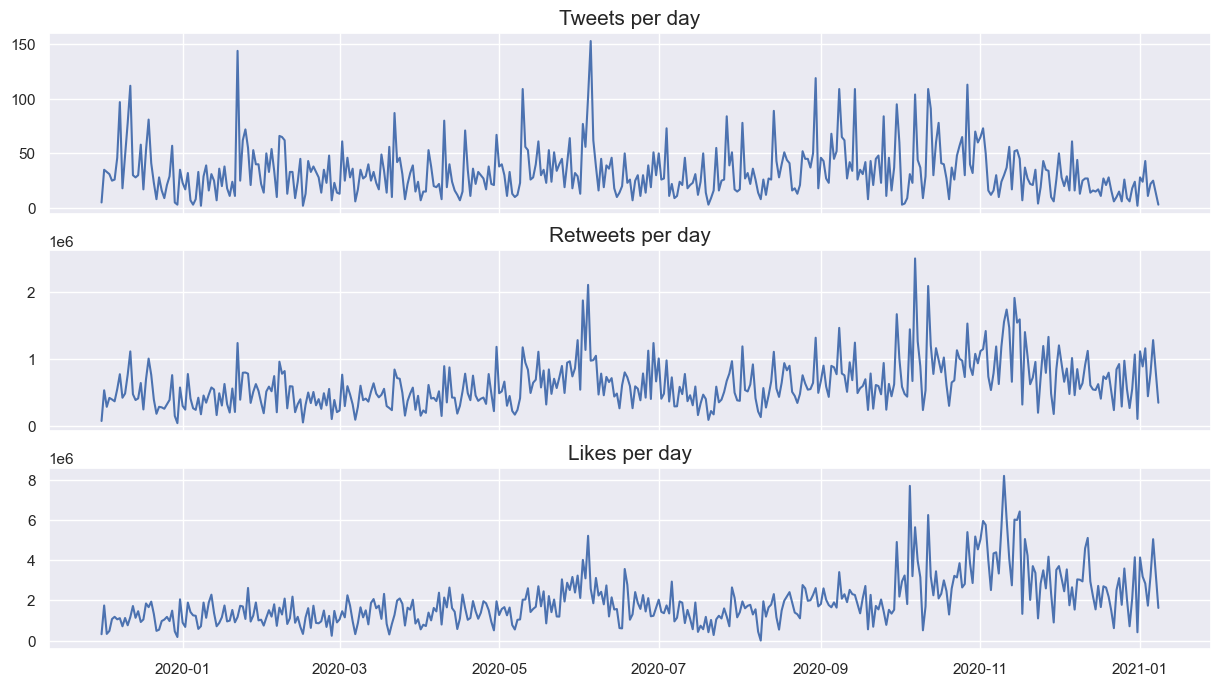

In [44]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, sharex=True, sharey=False)

axes[0].plot(data['date'], data['per_day_tweets'])
axes[0].set_title('Tweets per day', size=15)
axes[1].plot(data['date'], data['per_day_retweets'])
axes[1].set_title('Retweets per day', size=15)
axes[2].plot(data['date'], data['per_day_likes'])
axes[2].set_title('Likes per day', size=15)


plt.show()

There's a correlation between the variables

In [45]:
corr_number_retweets = np.corrcoef(data['per_day_tweets'], data['per_day_retweets'])
print(f'Correlation Coefficient: {corr_number_retweets[0, 1]:.2f}')
corr_number_likes = np.corrcoef(data['per_day_tweets'], data['per_day_likes'])
print(f'Correlation Coefficient: {corr_number_likes[0, 1]:.2f}')
corr_number_likes_retweets = np.corrcoef(data['per_day_retweets'], data['per_day_likes'])
print(f'Correlation Coefficient: {corr_number_likes_retweets[0, 1]:.2f}')


Correlation Coefficient: 0.66
Correlation Coefficient: 0.26
Correlation Coefficient: 0.78


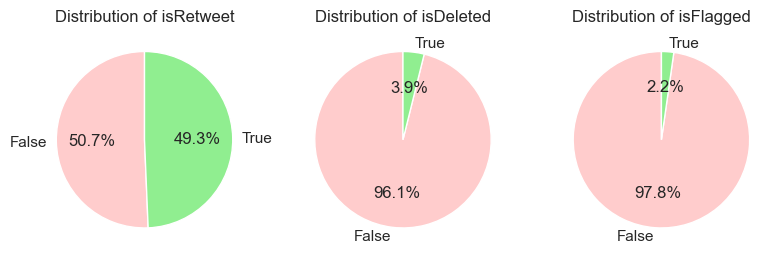

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize=(8, 12))

variables = ['isRetweet', 'isDeleted', 'isFlagged']
colors = ['#FFCCCC', 'lightgreen']

for i, var in enumerate(variables):
    ax = axes[i]
    ax.pie(data[var].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()


Let's focus on covid topics

In [47]:
#download a english dictionary to make anlysis
nlp = spacy.load('en_core_web_sm')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(spacy_stopwords))

Number of stop words: 326


In [48]:
#put all the text togheter
result_text = ' '.join(data['text'])

def remove_stopwords(chunk):
    return ' '.join([token.text for token in chunk if (not token.is_stop)])


#max length for spaCy nlp
chunk_size = 100000
chunks = [result_text[i:i+chunk_size] for i in range(0, len(result_text), chunk_size)]

# Process each chunk separately
processed_chunks = [nlp(chunk) for chunk in chunks]
processed_chunks_no_stopwords = [remove_stopwords(chunk) for chunk in processed_chunks]

In [49]:
clean = ' '.join(processed_chunks_no_stopwords)
clean= re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '',clean)
clean= clean.translate(str.maketrans('', '', string.punctuation))
clean = clean.replace('amp', '')
clean = clean.replace('RT', '')
clean = clean.replace('realDonaldTrump', '')


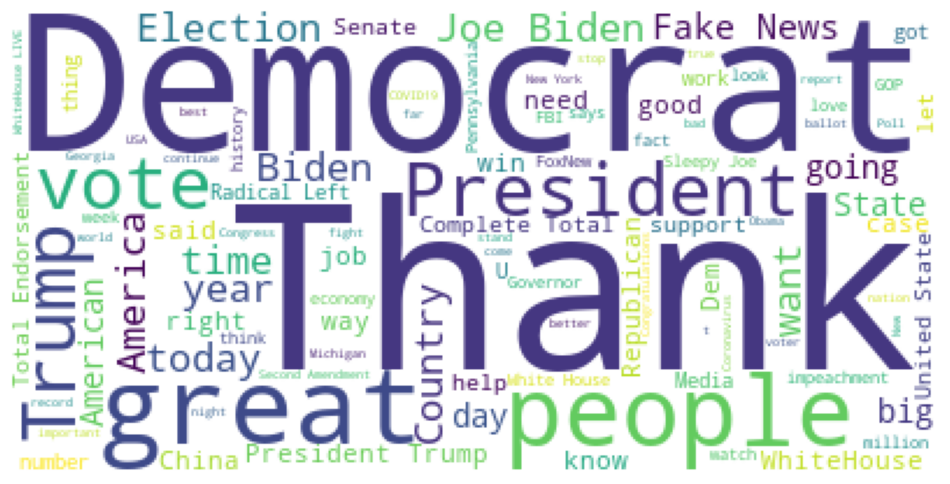

In [50]:
#generating the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

In [51]:
list_of_words = ['Covid19', 'virus', 'China', 'vaccine', 'Flu', 'Covid', 'lockdown', 'pandemic', 'coronavirus', 'Coronavirus', 'Corona', 'corona', 'COVID19', 'COVID', 'covid', 'quarantine', 'Quarantine', 'quarentine', 'Quarentine', 'quarantined', 'Quarantined', 'quarentined', 'Quarentined', 'quarantining', 'Quarantining', 'quarentining', 'Quarentining', 'quarantines', 'Quarantines', 'quarentines', 'Quarentines', 'quarantine', 'Quarantine', 'quarentine', 'Quarentine', 'quarantining', 'Quarantining', 'quarentining', 'Quarentining', 'quarantines', 'Quarantines', 'quarentines', 'Quarentines', 'quarantine', 'Quarantine', 'quarentine', 'Quarentine', 'quarantining', 'Quarantining', 'quarentining', 'Quarentining', 'quarantines', 'Quarantines', 'quarentines', 'Quarentines', 'quarantine', 'Quarantine', 'quarentine', 'Quarentine', 'quarantining', 'Quarantining', 'quarentining', 'Quarentining', 'quarantines', 'Quarantines', 'quarentines', 'Quarentines']
data['covid_related'] = data['text'].apply(lambda x: True if any(word in x for word in list_of_words) else False)

data['covid_related'].value_counts()

covid_related
False    12662
True       856
Name: count, dtype: int64

Find the moment when the topic is the most popular

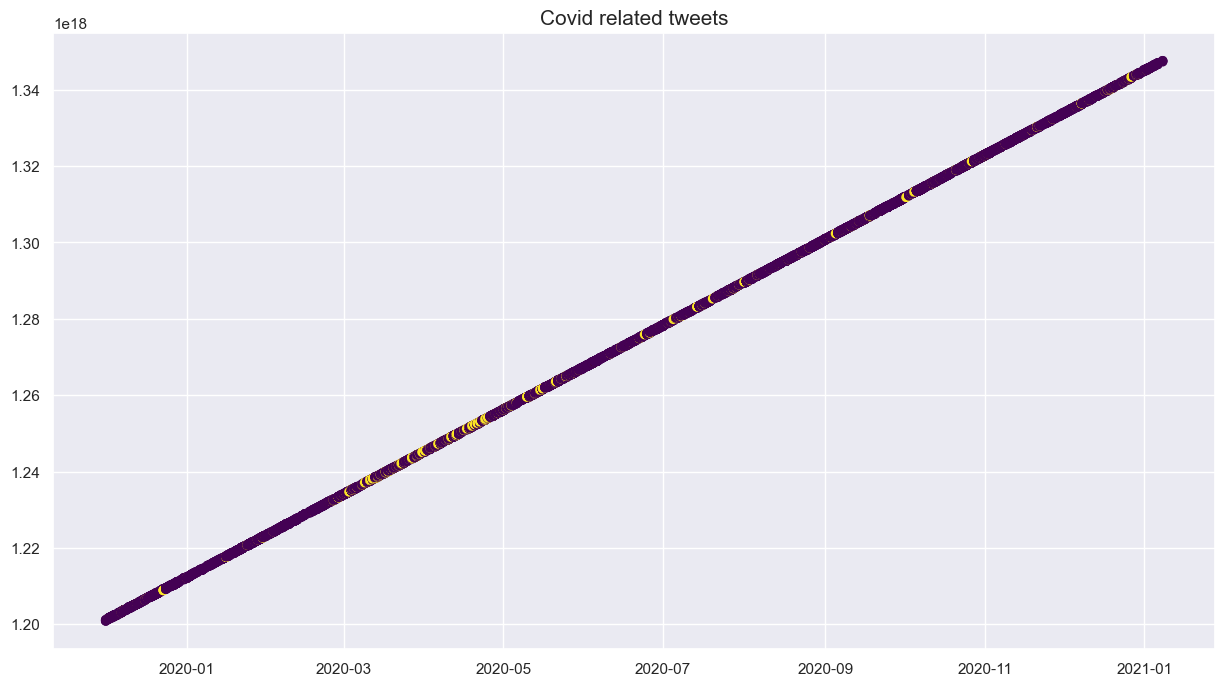

In [52]:
#fig, axes = plt.subplots(nrows = 3, ncols = 1, sharex=True, sharey=False)

plt.scatter(data['date'], data['id'], c=data['covid_related'], cmap='viridis')
plt.title('Covid related tweets', size=15)
plt.show()


Now let's discover if among the most retweeted and the most liked tweets there are some that are related to covid

In [53]:
data['decile_retweeted'] = pd.qcut(data['retweets'], 10, labels=False, duplicates='drop')
data['decile_favorited'] = pd.qcut(data['favorites'], 10, labels=False, duplicates='drop')
data.head()

id                                               text isRetweet  \
0  1.200949e+18  “Sen. Tim Scott Says Trump 'Innocent,' 'No Way...         f   
1  1.201207e+18  ....in America, community by community where w...         f   
2  1.201207e+18  On World AIDS Day, The First Lady and I expres...         f   
3  1.200950e+18  “Schiff’s impeachment hearings wasting time wh...         f   
4  1.200949e+18  “Trump did nothing impeachable, day-by-day rev...         f   

  isDeleted              device  favorites  retweets       date isFlagged  \
0         f  Twitter for iPhone    52381.0   14045.0 2019-12-01         f   
1         f  Twitter for iPhone    51297.0   10488.0 2019-12-01         f   
2         f  Twitter for iPhone    88404.0   17422.0 2019-12-01         f   
3         f  Twitter for iPhone    78199.0   19648.0 2019-12-01         f   
4         f  Twitter for iPhone    46554.0   12497.0 2019-12-01         f   

   per_day_tweets  per_day_retweets  per_day_likes  covid_related  \
0               5           74100.0       316835.0          False   
1               5           74100.0       316835.0          False   
2               5           74100.0       316835.0          False   
3               5           74100.0       316835.0          False   
4               5           74100.0       316835.0          False   

   decile_retweeted  decile_favorited  
0                 5                 2  
1                 3                 2  
2                 6                 3  
3                 6                 3  
4                 4                 1

In [54]:
data_covid_favorites = data.query('covid_related == True and (decile_favorited == 9 or decile_favorited == 8 or decile_favorited == 7 or decile_retweeted == 9 or decile_retweeted == 8 or decile_retweeted == 7)')

In [55]:
data_covid_favorites.shape

(250, 15)

There are some popular tweets that are related to covid let's see if they also contain words related to possible fake news

In [56]:
fake_news = ['Hydroxychloroquine', 'hydroxychloroquine']
analyze = data_covid_favorites['text'].apply(lambda x: True if any(word in x for word in fake_news) else False)

In [57]:
analyze.value_counts()

text
False    249
True       1
Name: count, dtype: int64

## If we don't filter per covid and quantile

In [58]:
analyze1 = data['text'].apply(lambda x: True if any(word in x for word in fake_news) else False)
analyze1.value_counts()

text
False    13496
True        22
Name: count, dtype: int64

## If we don't filter per quantile

In [59]:
dg = data[data['covid_related'] == True]
analyze2 = dg['text'].apply(lambda x: True if any(word in x for word in fake_news) else False)
analyze2.value_counts()

text
False    849
True       7
Name: count, dtype: int64

## If we don't filter per covid

In [60]:
dq = data.query('decile_favorited == 9 or decile_favorited == 8 or decile_favorited == 7 or decile_retweeted == 9 or decile_retweeted == 8 or decile_retweeted == 7')
analyze3 = dg['text'].apply(lambda x: True if any(word in x for word in fake_news) else False)
analyze3.value_counts()

text
False    849
True       7
Name: count, dtype: int64

In [61]:
# create a new column with the result of the analysis
new_col = analyze3.reindex(data.index, fill_value=False)
data['Hydroxychloroquine']=new_col

We should focus on the last one

Text(0.5, 1.0, 'Covid related tweets')

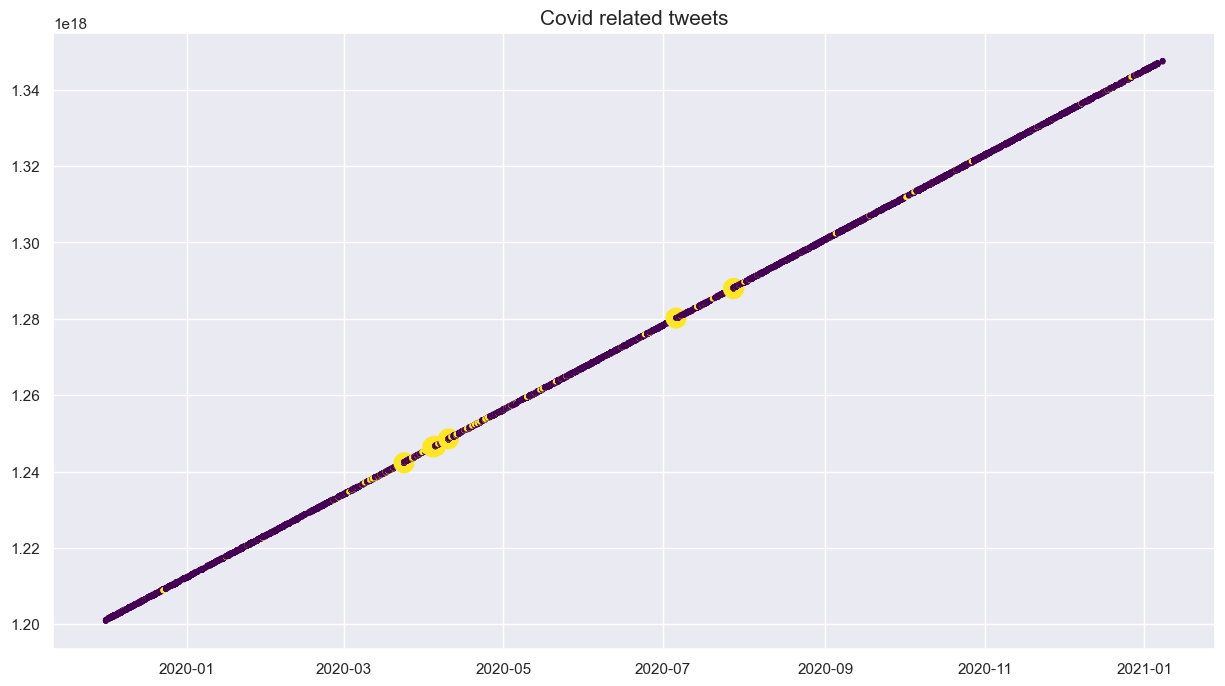

In [62]:
condition = data['Hydroxychloroquine']  # Replace 'condition_column' with your actual column name

# Define the sizes of the dots (10 for False, 50 for True)
sizes = [10 if not cond else 200 for cond in condition]

# Scatter plot with custom sizes
plt.scatter(data['date'], data['id'], c=data['covid_related'], cmap='viridis', s=sizes)

# Add title
plt.title('Covid related tweets', size=15)

In [63]:
import pandas as pd
import json

# Load JSON data
with open('file.json', 'r') as file:
    data_views = json.load(file)

# Extract dates and views
datess = [item['timestamp'] for item in data_views['items']]
views = [item['views'] for item in data_views['items']]

# Combine dates and views into a list of tuples
date_views_list = list(zip(datess, views))

# Create a Pandas DataFrame
df = pd.DataFrame(date_views_list, columns=['Date', 'Views'])

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d00')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Convert the 'Views' column to a Pandas Series
views_series = df['Views']


In [64]:
# get the dates where trump spoke
critical_data = data[data['Hydroxychloroquine'] == True]['date']
specific_dates = pd.to_datetime(critical_data, format='%Y%m%d')

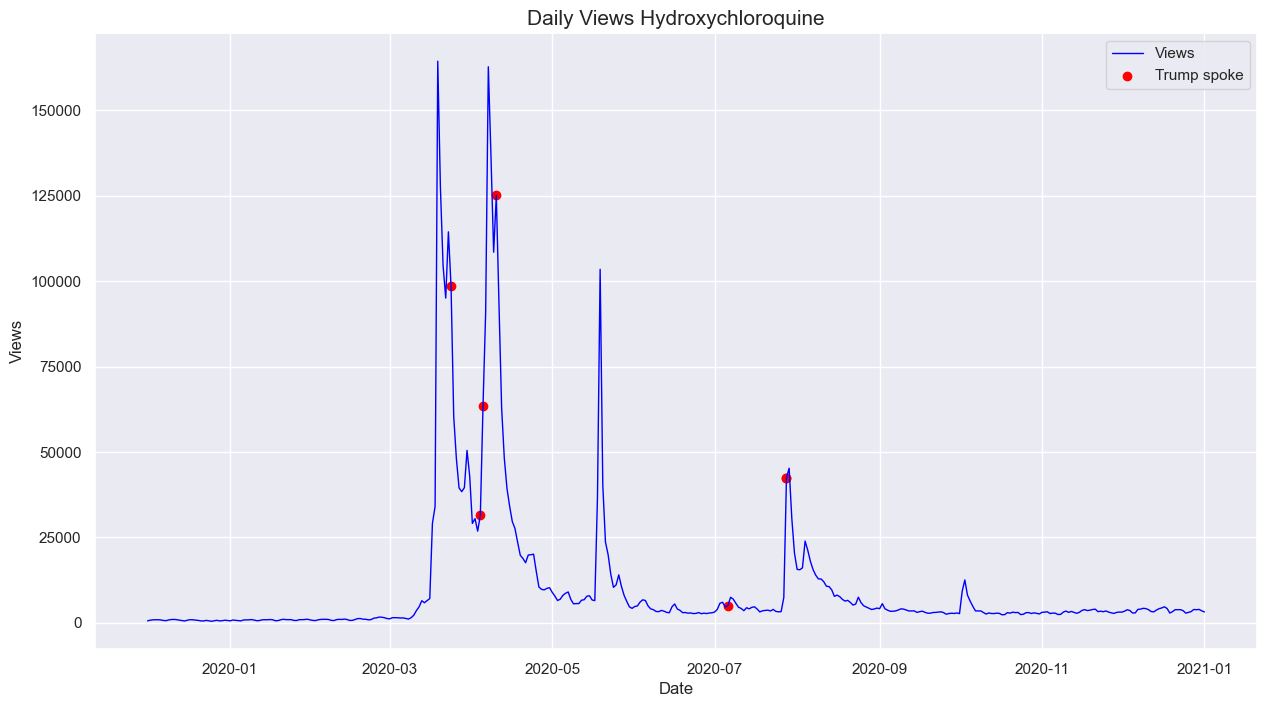

In [67]:
specific_views = views_series.loc[specific_dates]

# Plotting the data
plt.plot(views_series, color='blue', linewidth=1)
plt.scatter(specific_views.index, specific_views, color='red')  # Add red dots
plt.title('Daily Views Hydroxychloroquine', size=15)
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend(['Views', 'Trump spoke'])
plt.show()